# Dependencies 

In [1]:
import sys
sys.path.append('src/')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from mrk_file import MRKFile
from utils import plot

%matplotlib inline

# Helper Functions

In [2]:
def load_mrk_files_from_folder(folder_path):
    mrk_filepaths = glob(os.path.join(folder_path, '*.mrk'))
    
    mrk_files = []
    for i, mrk_path in enumerate(mrk_filepaths):
        print('{} of {}'.format(i+1, len(mrk_filepaths)), end='\r')
        mrk_files.append(MRKFile(mrk_path))
    print()
    return mrk_files

# Data Loading

In [3]:
mrk_train_fvc_extended = load_mrk_files_from_folder('data/train/FVC_Extended/ground_truth/')
mrk_train_visio_vsoft = load_mrk_files_from_folder('data/train/Visio_Vsoft/ground_truth/')
mrk_test_fvc = load_mrk_files_from_folder('data/test/FVC/ground_truth/')
mrk_test_fvc_extended = load_mrk_files_from_folder('data/test/FVC_Extended/ground_truth/')
mrk_test_visio_vsoft = load_mrk_files_from_folder('data/test/Visio_Vsoft/ground_truth/')

2628 of 2628
1951 of 1951
565 of 565
56 of 56
576 of 576


In [4]:
req_names = [req.description for req in mrk_train_fvc_extended[0].photo_reqs]
n_reqs = len(req_names)

print(n_reqs)
print(req_names)

23
['Blurred', 'Looking away', 'Ink marked/creased', 'Unnatural skin tone', 'Too dark/light', 'Washed out', 'Pixelation', 'Hair across eyes', 'Eyes closed', 'Varied background', 'Roll/pitch/yaw rotations greater than a predefined thresholds', 'Flash reflection on skin', 'Red eyes', 'Shadows behind head', 'Shadows across face', 'Dark tinted lenses', 'Flash reflection on lenses', 'Frames too heavy', 'Frame covering eyes', 'Hat/cap', 'Veil over face', 'Mouth open', 'Presence of other faces or toys too close to face']


# Data Analysis

### Requirements per Dataset 

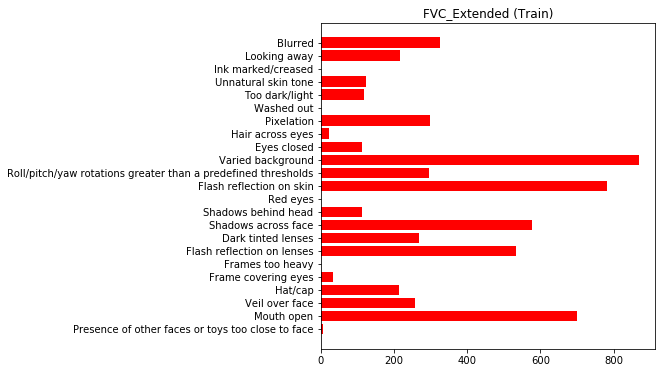

In [5]:
counts_train_fvc_extended = plot.requirements_count(mrk_train_fvc_extended, fig_title='FVC_Extended (Train)', fig_color='red')

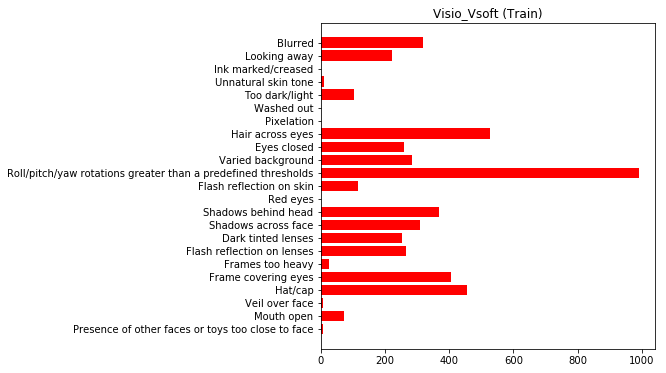

In [6]:
counts_train_visio_vsoft = plot.requirements_count(mrk_train_visio_vsoft, fig_title='Visio_Vsoft (Train)', fig_color='red')

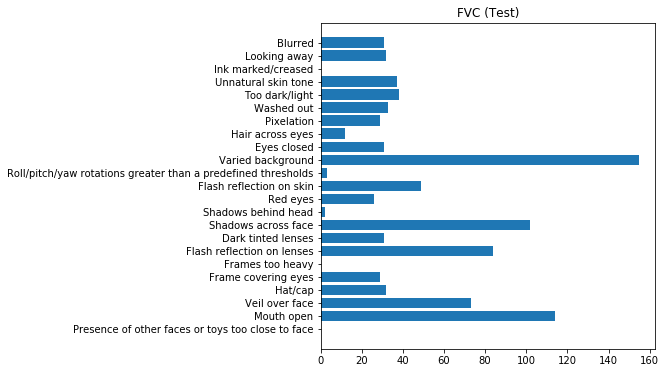

In [7]:
counts_test_fvc = plot.requirements_count(mrk_test_fvc, fig_title='FVC (Test)')

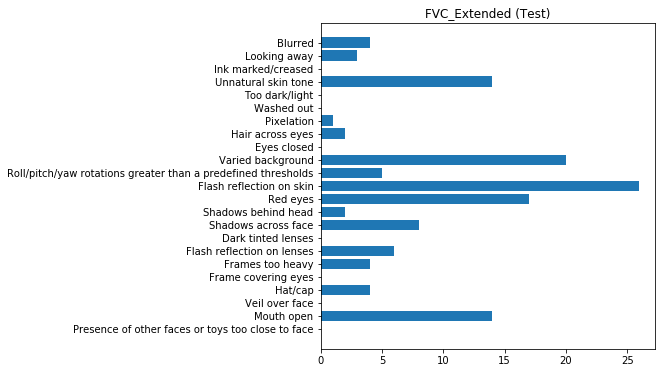

In [8]:
counts_test_fvc_extended = plot.requirements_count(mrk_test_fvc_extended, fig_title='FVC_Extended (Test)')

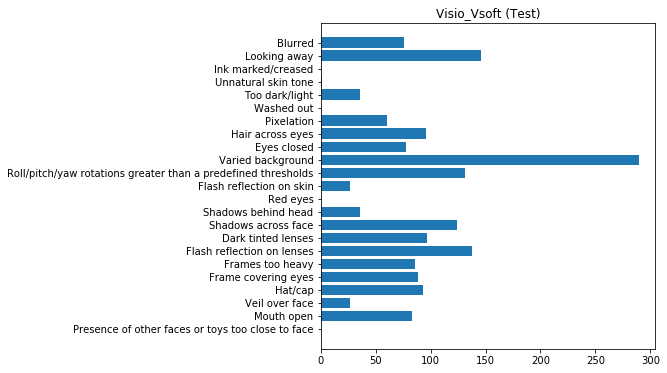

In [9]:
counts_test_visio_vsoft = plot.requirements_count(mrk_test_visio_vsoft, fig_title='Visio_Vsoft (Test)')

In [10]:
dataset_counts = np.vstack((counts_train_fvc_extended, 
                            counts_train_visio_vsoft, 
                            counts_test_fvc, 
                            counts_test_fvc_extended, 
                            counts_test_visio_vsoft))

df = pd.DataFrame(dataset_counts, columns=req_names, index=['FVC_Extended (train)', 
                                                            'Visio_Vsoft (train)', 
                                                            'FVC (test)', 
                                                            'FVC_Extended (test)', 
                                                            'Visio_Vsoft (test)'])

df.T

,FVC_Extended (train),Visio_Vsoft (train),FVC (test),FVC_Extended (test),Visio_Vsoft (test)
Blurred,327,319,31,4,76
Looking away,217,222,32,3,146
Ink marked/creased,1,2,0,0,0
Unnatural skin tone,124,11,37,14,1
Too dark/light,118,105,38,0,36
Washed out,2,0,33,0,0
Pixelation,299,2,29,1,60
Hair across eyes,24,526,12,2,96
Eyes closed,112,259,31,0,78
Varied background,870,285,155,20,290


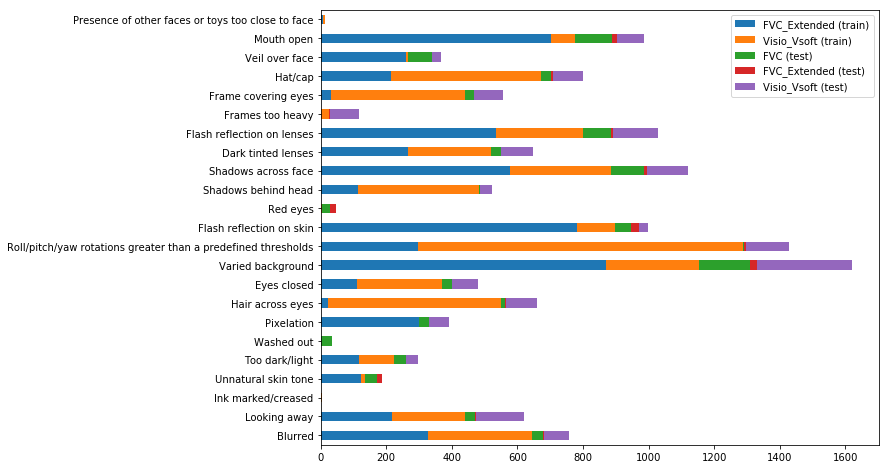

In [11]:
df.T.plot(kind='barh', stacked=True, figsize=(10, 8))